In [1]:
!conda install -c conda-forge pandas pandas-profiling matplotlib openpyxl -y

Solving environment: done

# All requested packages already installed.



In [2]:
conda install -c conda-forge phik -y

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
#pip install pandas-profiling

In [4]:
#pip install scikit-plot

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('clean_churn_data.csv',index_col='Unnamed: 0')

In [7]:
X = df.drop(["customerID", "Box_Cox"], axis = "columns", inplace = True)

In [8]:
features = df.drop('Churn', axis=1)
targets = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=42)

In [9]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(x_train, y_train)

print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

print((dt.score(x_train, y_train))-(dt.score(x_test, y_test)))

0.804133485020857
0.7889647326507395
0.0151687523701175


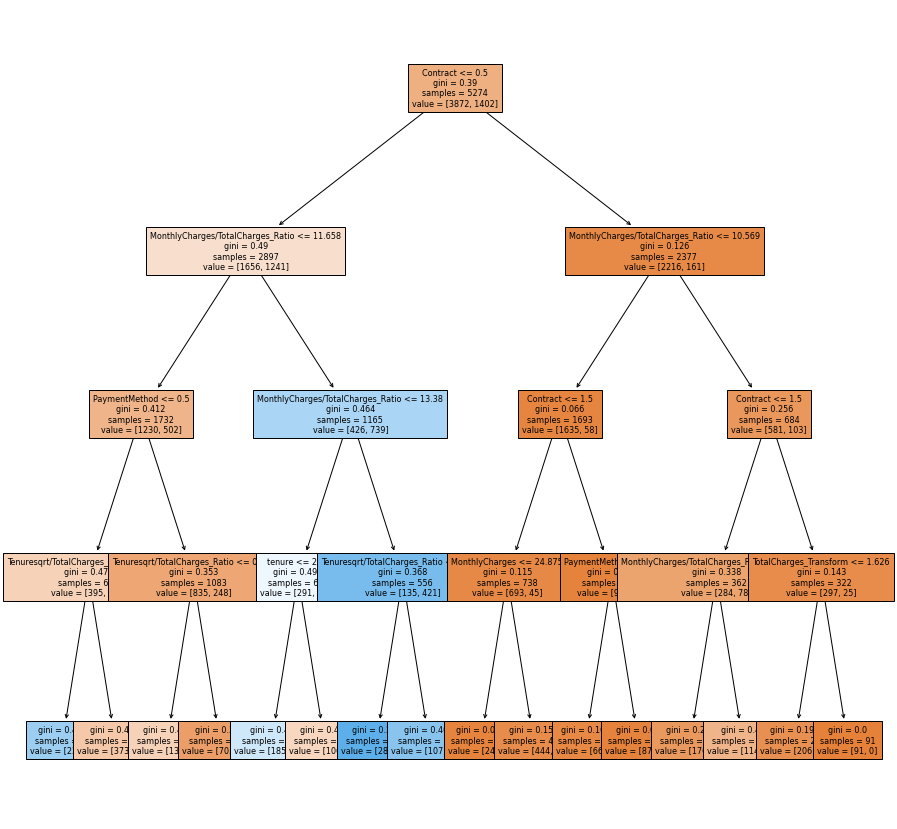

In [10]:
f = plt.figure(figsize=(15, 15))
_ = plot_tree(dt, fontsize=8, feature_names=features.columns, filled=True)

In [11]:
#X = df.drop(["customerID", "Box_Cox"], axis = "columns", inplace = True)

In [12]:
features = df.drop('Churn', axis=1)
targets = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=42)

In [13]:
import math

math.sqrt(x_train.shape[1])

3.1622776601683795

In [14]:
from sklearn.ensemble import RandomForestClassifier

#With all features

rfc = RandomForestClassifier(max_depth=4, max_features=9, random_state=42)
rfc.fit(x_train, y_train)

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

print((rfc.score(x_train, y_train))-(rfc.score(x_test, y_test)))

0.8020477815699659
0.7940841865756542
0.007963594994311762


<AxesSubplot:title={'center':'Feature Importance'}>

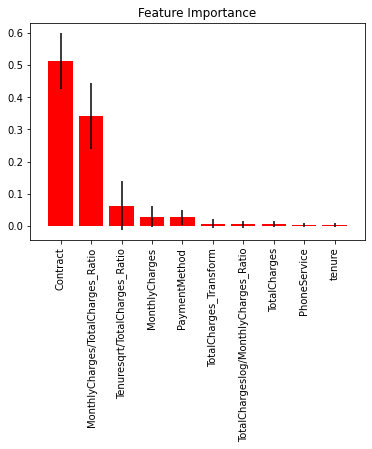

In [14]:
from scikitplot.estimators import plot_feature_importances

plot_feature_importances(rfc, feature_names=features.columns, x_tick_rotation=90)

<AxesSubplot:>

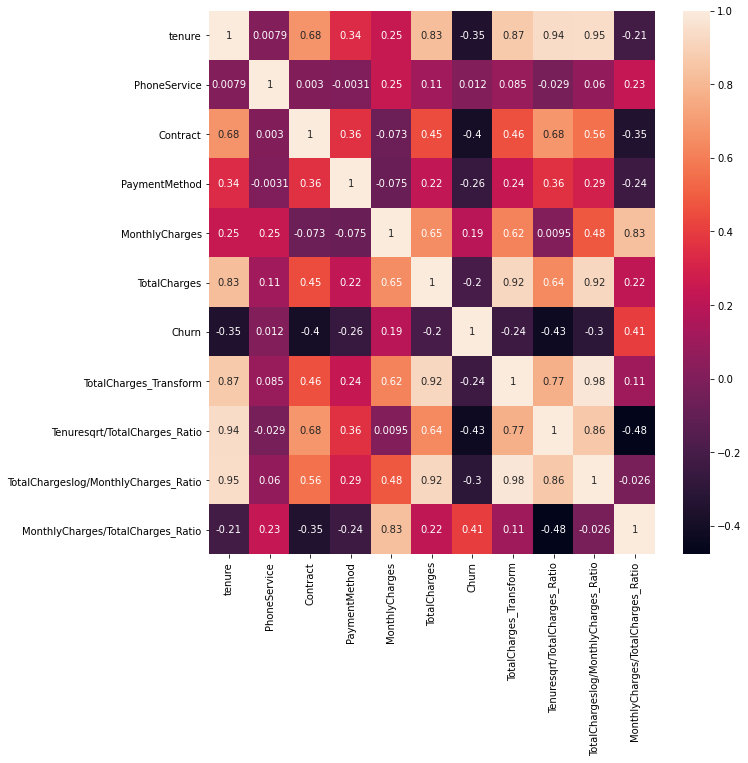

In [15]:
import seaborn as sns
f = plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

In [16]:
import phik

df.phik_matrix()

interval columns not set, guessing: ['tenure', 'PhoneService', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'TotalCharges_Transform', 'Tenuresqrt/TotalCharges_Ratio', 'TotalChargeslog/MonthlyCharges_Ratio', 'MonthlyCharges/TotalCharges_Ratio']


,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_Transform,Tenuresqrt/TotalCharges_Ratio,TotalChargeslog/MonthlyCharges_Ratio,MonthlyCharges/TotalCharges_Ratio
tenure,1.000000,0.000000,0.666958,0.373584,0.409989,0.842068,0.473761,0.869210,0.918417,0.914970,0.499175
PhoneService,0.000000,1.000000,0.000000,0.000000,0.831671,0.197820,0.000000,0.202427,0.210804,0.144615,0.743224
Contract,0.666958,0.000000,1.000000,0.277528,0.388557,0.507638,0.251283,0.523209,0.690731,0.572056,0.428393
PaymentMethod,0.373584,0.000000,0.277528,1.000000,0.398849,0.349956,0.448559,0.380391,0.382010,0.368548,0.399126
MonthlyCharges,0.409989,0.831671,0.388557,0.398849,1.000000,0.762904,0.359623,0.722785,0.568049,0.643947,0.873121
TotalCharges,0.842068,0.197820,0.507638,0.349956,0.762904,1.000000,0.280973,0.960661,0.821180,0.941948,0.636903
Churn,0.473761,0.000000,0.251283,0.448559,0.359623,0.280973,1.000000,0.345295,0.560039,0.412686,0.557750
TotalCharges_Transform,0.869210,0.202427,0.523209,0.380391,0.722785,0.960661,0.345295,1.000000,0.871116,0.959957,0.727896
Tenuresqrt/TotalCharges_Ratio,0.918417,0.210804,0.690731,0.382010,0.568049,0.821180,0.560039,0.871116,1.000000,0.899325,0.738178
TotalChargeslog/MonthlyCharges_Ratio,0.914970,0.144615,0.572056,0.368548,0.643947,0.941948,0.412686,0.959957,0.899325,1.000000,0.648680


In [18]:
#X = df.drop(["customerID", "Box_Cox", "PhoneService", "Contract", 'TotalCharges'], axis = "columns", inplace = True)

In [19]:
X = df.drop(["PhoneService", "Contract", 'TotalCharges'], axis = "columns", inplace = True)

In [20]:
features = df.drop('Churn', axis=1)
targets = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=42)

In [21]:
import math

math.sqrt(x_train.shape[1])

2.6457513110645907

In [22]:
from sklearn.ensemble import RandomForestClassifier

#With features with a correlation greater than 34 from phik

rfc = RandomForestClassifier(max_depth=5, max_features=5, random_state=42) 
rfc.fit(x_train, y_train)

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

print((rfc.score(x_train, y_train))-(rfc.score(x_test, y_test)))

0.8079256731133865
0.7901023890784983
0.017823284034888198


<AxesSubplot:title={'center':'Feature Importance'}>

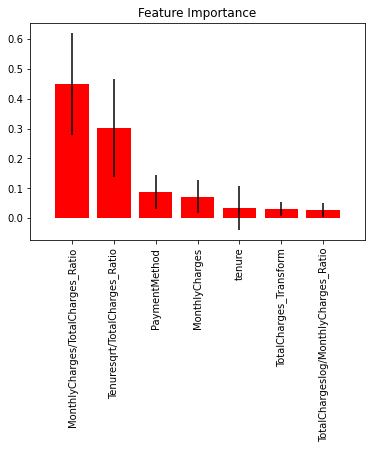

In [23]:
from scikitplot.estimators import plot_feature_importances

plot_feature_importances(rfc, feature_names=features.columns, x_tick_rotation=90)

In [24]:
#X = df.drop(["customerID", "Box_Cox","PhoneService", "Contract", "TotalCharges", "Tenuresqrt/TotalCharges_Ratio","TotalChargeslog/MonthlyCharges_Ratio", "MonthlyCharges/TotalCharges_Ratio"], axis = "columns", inplace = True)

In [25]:
X = df.drop(["Tenuresqrt/TotalCharges_Ratio","TotalChargeslog/MonthlyCharges_Ratio", "MonthlyCharges/TotalCharges_Ratio"], axis = "columns", inplace = True)

In [26]:
features = df.drop('Churn', axis=1)
targets = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=42)

In [27]:
import math

math.sqrt(x_train.shape[1])

2.0

In [28]:
from sklearn.ensemble import RandomForestClassifier

#With all features that were relevant and not ratios

#RandomForest better than decision tree

rfc = RandomForestClassifier(max_depth=4, max_features=3, random_state=25) 
rfc.fit(x_train, y_train)

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

print((rfc.score(x_train, y_train))-(rfc.score(x_test, y_test)))

0.7993932499051953
0.7861205915813424
0.013272658323852937


<AxesSubplot:title={'center':'Feature Importance'}>

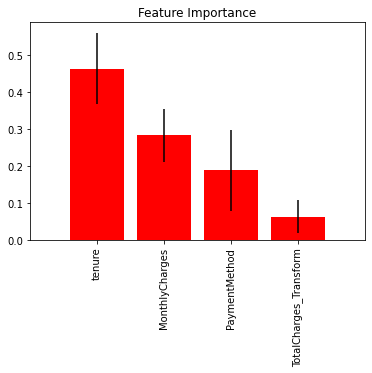

In [29]:
from scikitplot.estimators import plot_feature_importances

plot_feature_importances(rfc, feature_names=features.columns, x_tick_rotation=90)

To begin I used a decision tree and dropped only two values that didnt contribute to my analysis. A max depth of 4 seemed to get me the best accuracy. I then improved on this model by using a random forest. After changing the max depth to 4, amount of features to 9 and random state to 42 I was able to get a more accurate model with the same features used in the decision tree. I had 10 original features so it's interesting to see that using 9 of them gave me the best model even though my feature importance plot showed tenure and phone service as having almost no correlation. I wanted to see how good of a model I could create so I continued dropping features. Using the phik matrix I dropped all the features that had less than a 34% correlation with churn. I ended up dropping Phone Service, Contract and Total Charges. However, after changing the depth, amount of features and random state I wasn't able to improve on the previous model. For my last model I wanted to compare how it would have came out with the original features so I took out the ratios. This model was still good, but not better than the previous ones. Overall the best model was created with a random forest after keeping all of the features then adjusting  the settings. 


